## 공공보건 의료기관 현황 데이터 전처리

In [1]:
import pandas as pd
import numpy as np

medicalDF = pd.read_csv('공공보건의료기관현황.csv', index_col=0, encoding='euc-kr')
medicalDF.head()

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [2]:
# 주소 column에서 시도, 군구 정보 분리
addr = pd.DataFrame(medicalDF['주소'])
addr = addr['주소'].apply(lambda v : v.split()[:2]) # 시도, 군구 분리(공백기준)
addr = pd.DataFrame(addr.tolist(), columns=('시도', '군구')) # DataFrame 생성
addr

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시
...,...,...
222,충청북도,제천시
223,충청북도,충주시
224,충청북도,충주시
225,충청북도,영동군


In [3]:
addr['시도'].unique()    
# 창원시, 경산시, 천안시는 광역시나 특별시가 아님
# 경기, 경남, 경북, 충북, 서울시, 부산특별시, 대전시, 층남, 전남, 전북 변경

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [4]:
# 창원시, 경산시, 천안시 => 000도 00시로 변경
addr[addr['시도']=='창원시'] 

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [5]:
addr.iloc[27], addr.iloc[31] = ['경상남도', '창원시'], ['경상남도', '창원시']
addr.iloc[47] = ['경상북도', '경산시']
addr.iloc[209], addr.iloc[210] = ['충청남도', '천안시'], ['충청남도', '천안시']

In [6]:
# 표준 행정구역 이름으로 수정 ex) 경기 => 경기도, 서울시 => 서울특별시 ...
addr_aliases = {'경기':'경기도', '경남':'경상남도', '경북':'경상북도',
'충북':'충청북도', '서울시':'서울특별시', '부산특별시':'부산광역시',
'대전시':'대전광역시', '충남':'충청남도', '전남':'전라남도', '전북':'전라북도'}

# dict.get(key[,default])
# key에 해당하는 값이 없으면 default 값을 리턴시킨다.
addr['시도'] = addr['시도'].apply(lambda v: addr_aliases.get(v,v))
addr['시도'].unique() 

array(['강원도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도', '대전광역시',
       '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시', '충청남도',
       '울산광역시'], dtype=object)

In [7]:
# 같은 방식으로 군구 정보 확인, '아란13길' 데이터 변경
addr['군구'].unique()
addr[addr['군구']=='아란13길'] 

,시도,군구
75,제주특별자치도,아란13길


In [8]:
addr.iloc[75] = ['제주특별자치도', '제주시']
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '제주시', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군', '강동구',
       '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군', '양구군',
       '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구', '노원구',
       '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군', '연제구',
       '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구', '성동구',
       '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군', '진도군',
       '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시', '남원시',
       '군산시', '고창군', '진안군', '서귀포시', '천안시', '보령시', '서산시', '서천군', '홍성군',
     

In [9]:
# '시도'와 '군구'를 합친 새로운 컬럼 추가, count 컬럼 추가
addr['시도군구'] = addr['시도'] + ' ' + addr['군구']
addr['count'] = 0
addr.head()

,시도,군구,시도군구,count
0,강원도,춘천시,강원도 춘천시,0
1,강원도,삼척시,강원도 삼척시,0
2,강원도,영월군,강원도 영월군,0
3,강원도,원주시,강원도 원주시,0
4,강원도,강릉시,강원도 강릉시,0


In [10]:
# group화 후 의료기관의 수 구하기
addr_group = pd.DataFrame(addr.groupby(['시도','군구','시도군구'], 
                                      as_index=False).count())
addr_group.head()

,시도,군구,시도군구,count
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1


In [11]:
# '시도군구' 컬럼을 데이터프레임 병합에 사용할 인덱스로 설정
addr_group.set_index('시도군구', inplace=True)
addr_group.head()

,시도,군구,count
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1


## 행정구역별 인구수 데이터 준비

In [12]:
population = pd.read_excel('행정구역시군구별_성별인구수.xlsx')
population.head()

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51847509,25862863,25984646
1,서울특별시,소계,9733509,4745088,4988421
2,서울특별시,종로구,151215,73688,77527
3,서울특별시,중구,126201,61946,64255
4,서울특별시,용산구,229385,110701,118684


In [13]:
# 컬럼 이름 변경
population.rename(columns={'행정구역(시군구)별(1)':'시도',
                          '행정구역(시군구)별(2)':'군구'}, inplace=True)
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51847509,25862863,25984646
1,서울특별시,소계,9733509,4745088,4988421
2,서울특별시,종로구,151215,73688,77527
3,서울특별시,중구,126201,61946,64255
4,서울특별시,용산구,229385,110701,118684


In [14]:
# '군구' 컬럼의 공백제거
population['군구'] = population['군구'].str.strip()

# '시도'와 '군구'연결하여 '시도군구' 컬럼 추가
population['시도군구'] = population['시도'] + ' ' + population['군구']
population.set_index('시도군구', inplace=True)

In [15]:
# '군구' 컬럼에서 '소계'항목 제거
population = population[population['군구'] != '소계']

## 두개의 DataFrame 병합 : merge사용
- inner : 둘 이상의 DF에서 조건에 맞는 행을 연결
- outer : 한쪽 DF에만 존재하는 데이터를 다른 DF에 결합
- merger 메서드
     - DataFrame.merge(right, how='inner', left_on=None, right_on=None, left_index=True, right_index=True)
     - 데이터 프레임 연결 : 왼쪽을 기준
     - left_on, right_on : 왼쪽, 오른쪽 DF에서 값이 일치해야 할 항목
     - left_index = True : 인덱스를 기준으로 병합

In [16]:
# 의료기관 데이터와 인구수 데이터 병합
medical_popul_merge = pd.merge(addr_group, population, how='inner',
                              left_index=True, right_index=True)

In [17]:
# 병합 후 이름이 같은 컬럼에는 _x, _y가 붙는다
medical_popul_merge

,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,213328,105775,107553
강원도 동해시,강원도,동해시,1,강원도,동해시,90417,45782,44635
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,66806,33811,32995
강원도 속초시,강원도,속초시,1,강원도,속초시,81840,40470,41370
강원도 양구군,강원도,양구군,1,강원도,양구군,22526,11937,10589
...,...,...,...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,충청북도,단양군,29664,15023,14641
충청북도 영동군,충청북도,영동군,1,충청북도,영동군,48523,24060,24463
충청북도 제천시,충청북도,제천시,1,충청북도,제천시,134359,67326,67033


In [18]:
# 필요한 열들만 추출 후 컬럼명 변경
medical_popul_merge = medical_popul_merge[['시도_x','군구_x','count','총인구수 (명)']]
medical_popul_merge = medical_popul_merge.rename(columns={'시도_x':'시도',
                                                          '군구_x':'군구',
                                                          'count':'공공의료기관수',
                                                          '총인구수 (명)':'인구수'})
medical_popul_merge.head()

,시도,군구,공공의료기관수,인구수
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,213328
강원도 동해시,강원도,동해시,1,90417
강원도 삼척시,강원도,삼척시,1,66806
강원도 속초시,강원도,속초시,1,81840
강원도 양구군,강원도,양구군,1,22526


In [21]:
# 인구대비 공공의료기관 비율 계산 후 컬럼추가
medical_popul_merge['인구대비기관비율'] = np.round(medical_popul_merge['공공의료기관수'].div(medical_popul_merge['인구수'], axis=0) * 100000, 2)
medical_popul_merge.head()

,시도,군구,공공의료기관수,인구수,인구대비기관비율
시도군구,,,,,
강원도 강릉시,강원도,강릉시,4,213328,1.88
강원도 동해시,강원도,동해시,1,90417,1.11
강원도 삼척시,강원도,삼척시,1,66806,1.50
강원도 속초시,강원도,속초시,1,81840,1.22
강원도 양구군,강원도,양구군,1,22526,4.44


## 완성된 데이터 시각화

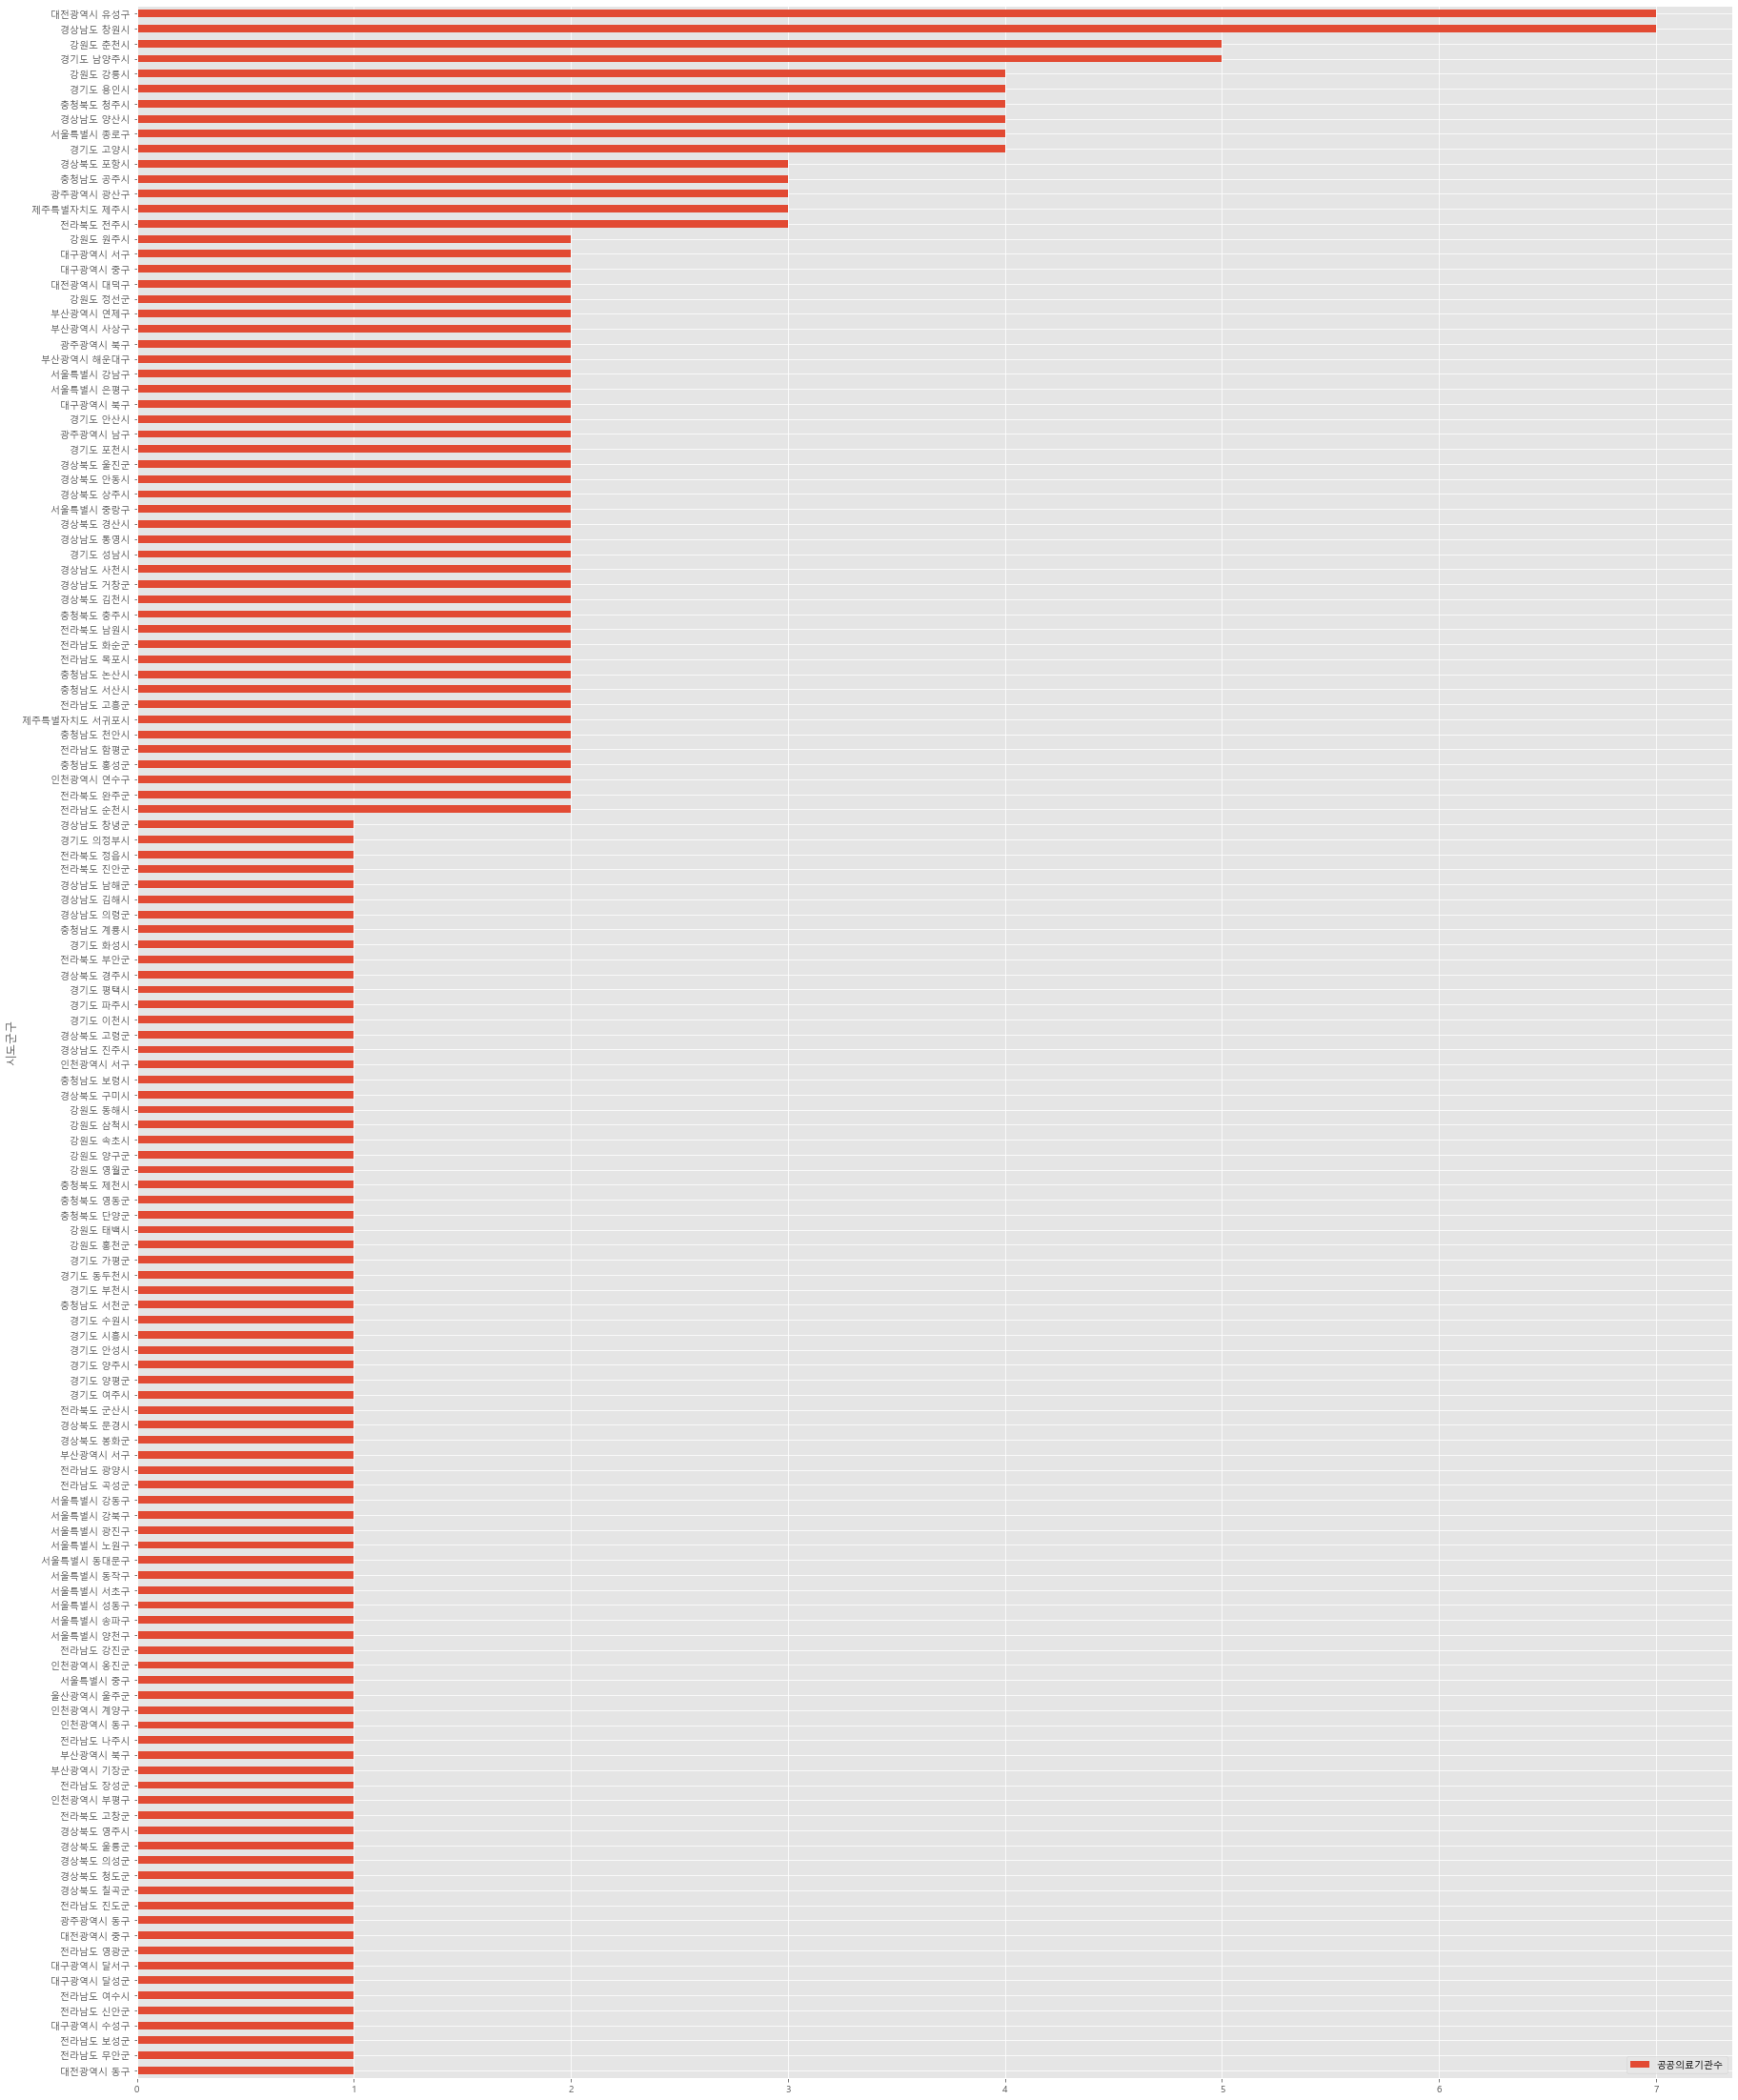

In [28]:
# 지역별 공공의료기관수 현황
import matplotlib.pyplot as plt
import platform
plt.style.use('ggplot')
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')
medical_num = medical_popul_merge[['공공의료기관수']]
medical_num = medical_num.sort_values('공공의료기관수', ascending=True)
medical_num.plot(kind='barh', figsize=(30, 40))
plt.show()

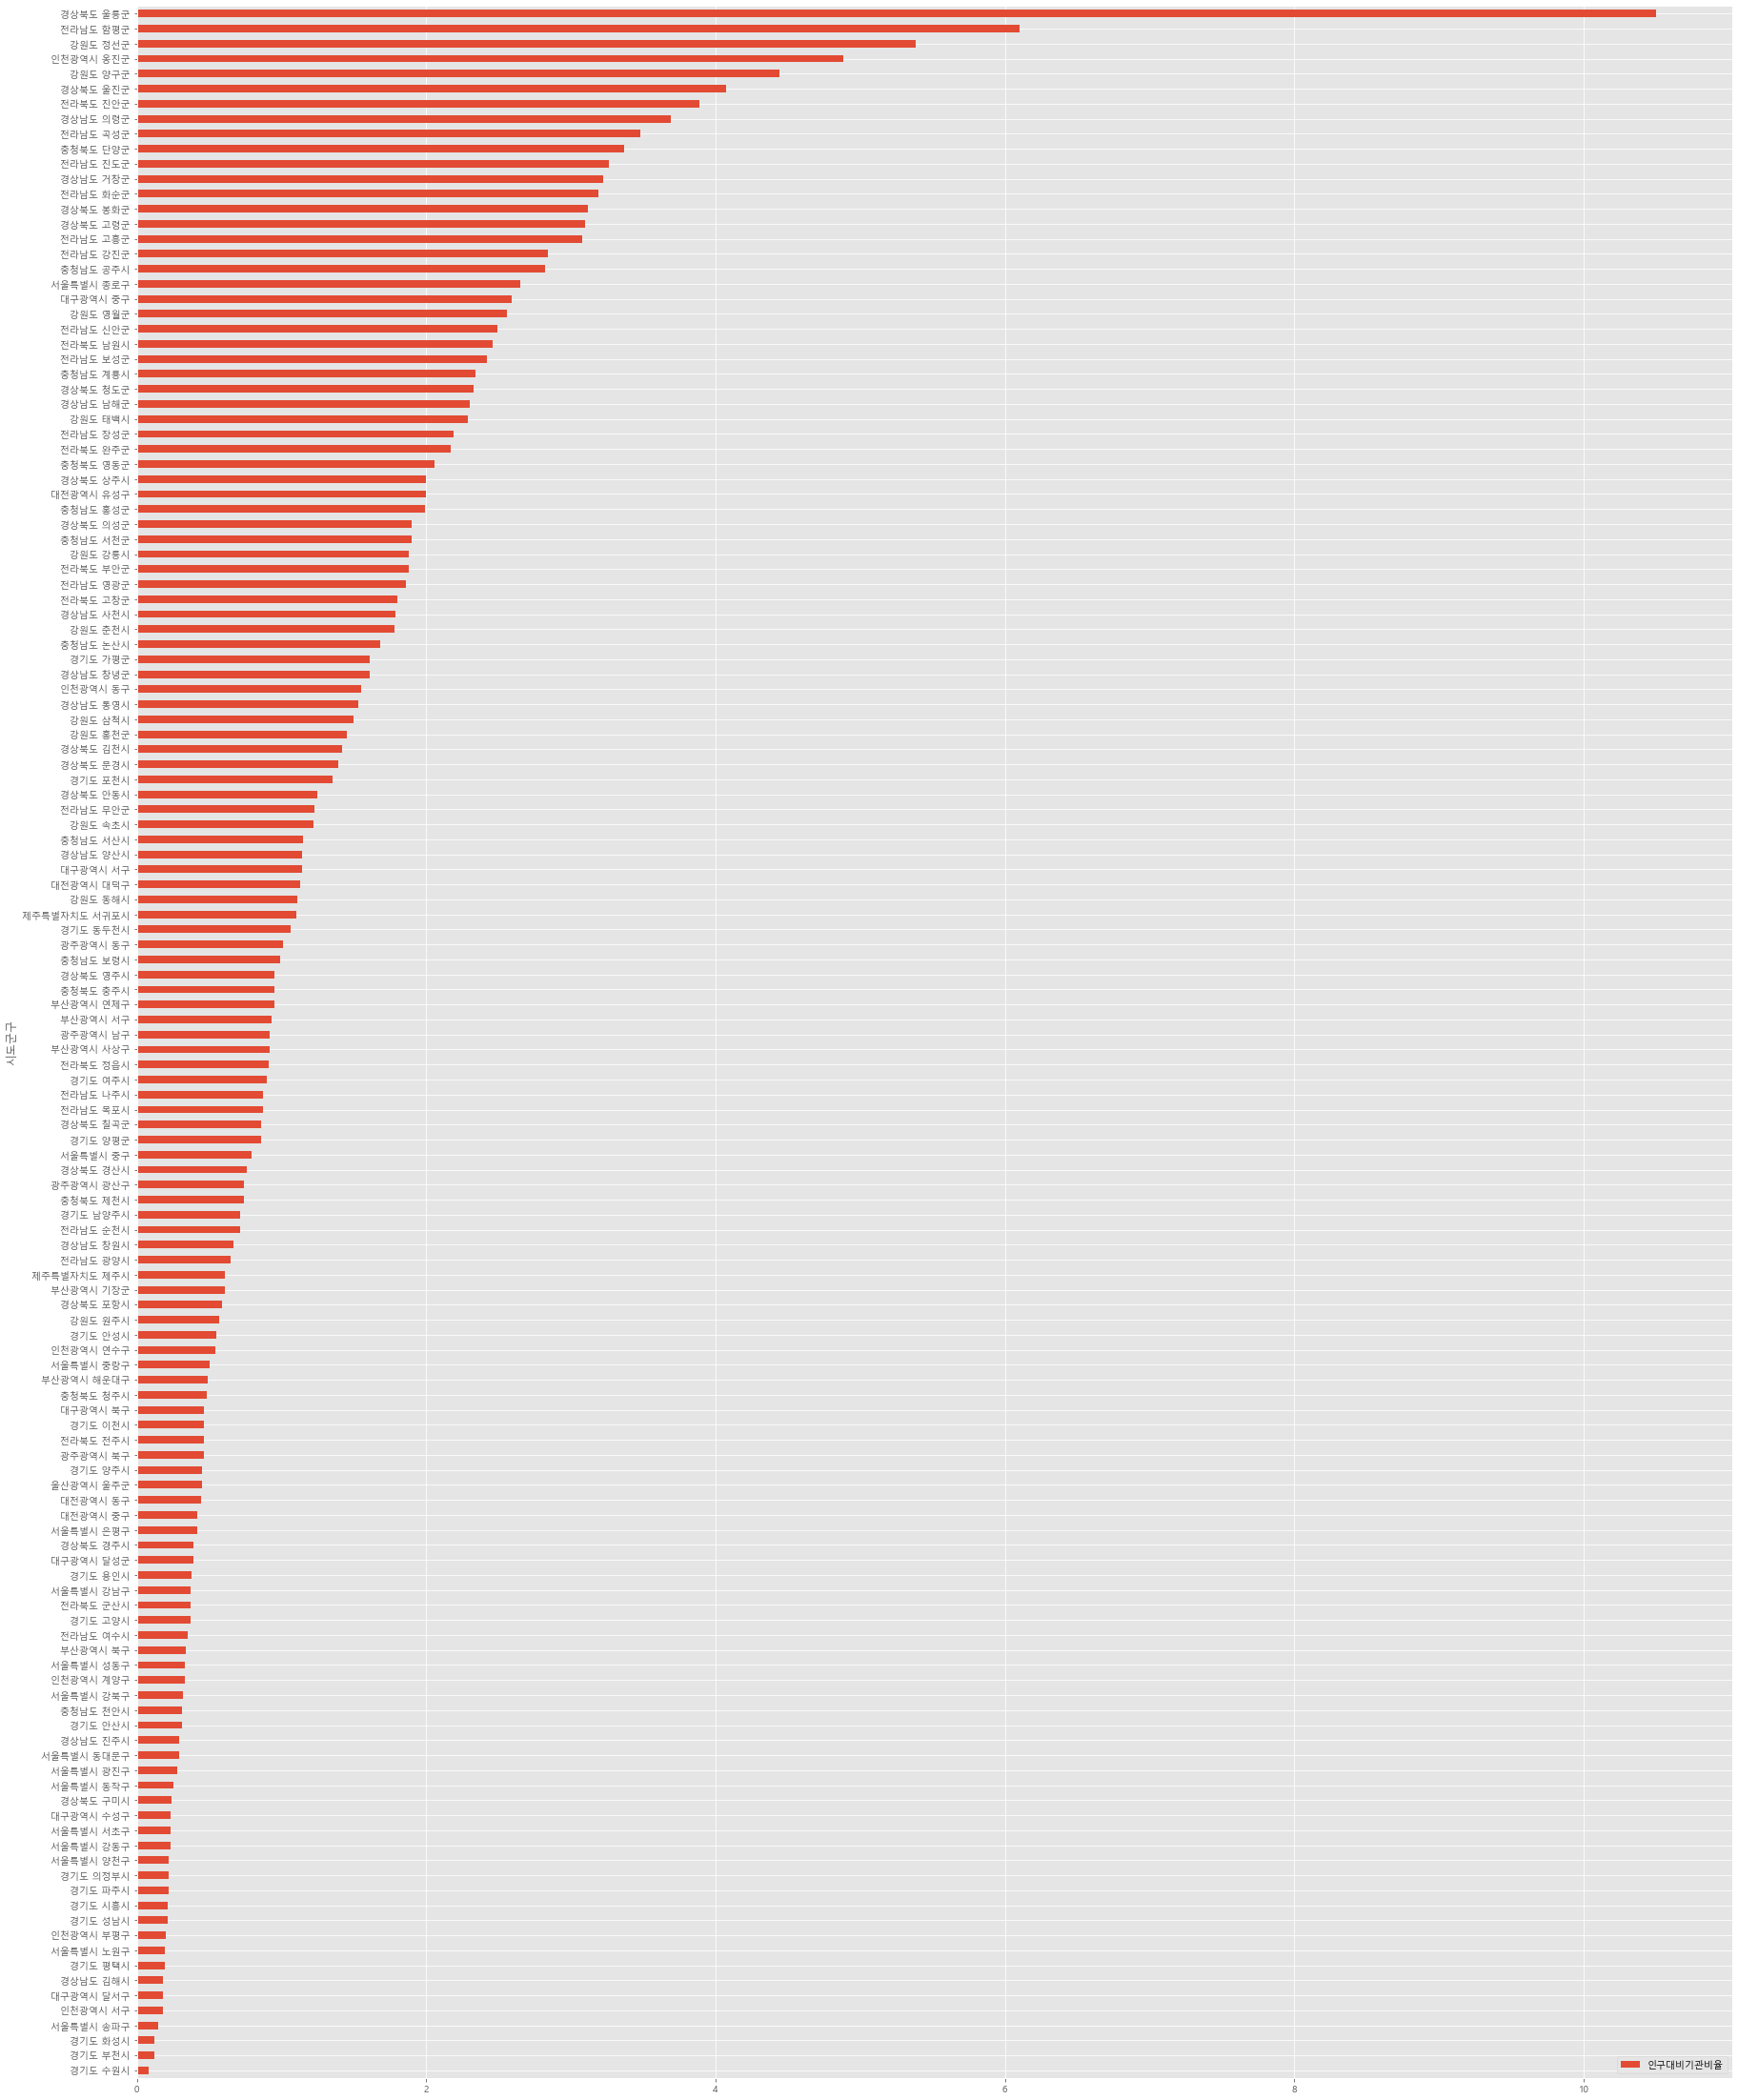

In [29]:
# 지역별 인구대비 공공의료기관 비율
plt.style.use('ggplot')
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')
medical_num = medical_popul_merge[['인구대비기관비율']]
medical_num = medical_num.sort_values('인구대비기관비율', ascending=True)
medical_num.plot(kind='barh', figsize=(30, 40))
plt.show()